# Email Classification Project ---- Spam/Ham

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# reading data from text file 
with open('SMSSpamCollection.txt','r') as file: 
    data = file.read()

In [3]:
temp = data.split('\n')

In [4]:
print("No. of emails : ",len(temp) )

No. of emails :  5575


In [5]:
x = [] 
y = [] 
for email_with_label in temp: 
    temp_emails = email_with_label.split('\t') 
    if len(temp_emails) == 2 : 
        x.append(temp_emails[1])
        y.append(temp_emails[0])
        
    

In [6]:
len(x),len(y)

(5574, 5574)

In [7]:
# dataframe
dt = {'email_message':x,"label":y}
email_data = pd.DataFrame(dt)
email_data.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [8]:
# df2 = pd.read_table('SMSSpamCollection.txt',header=None)
# df2.columns = ['label','email_message']

In [9]:
# df2.head()

In [10]:
# problem statment is reg or classifcication 
# ans is classification 
# we need to clasify the ham and spam

# is the data is blancnce or imbalacne

email_data['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [11]:
# 80% are ham
# 20% are spam
# now this is imbalanced ratio
# we need to bring it to 60 - 50 then we can say it is trained well


# how to do that, we can add the sapm email to equal the ham, incr or decr to make it balanced
# now we r going to remove the ham email to equle the spam.

In [12]:
ham = email_data[email_data["label"]== "ham"]
spam = email_data[email_data["label"]== "spam"]

In [13]:
ham.sample(1000) #selects random records 1000

,email_message,label
4076,"God picked up a flower and dippeditinaDEW, lov...",ham
2633,I WILL CAL YOU SIR. In meeting,ham
851,U reach orchard already? U wan 2 go buy ticket...,ham
4266,&lt;DECIMAL&gt; m but its not a common car he...,ham
4366,Ujhhhhhhh computer shipped out with address to...,ham
...,...,...
3526,I not free today i haf 2 pick my parents up to...,ham
3583,You are right. Meanwhile how's project twins c...,ham
2952,Hey now am free you can call me.,ham
4872,Well. You know what i mean. Texting,ham


In [14]:
ham = ham.sample(1000)

In [15]:
spam.shape, ham.shape

((747, 2), (1000, 2))

In [16]:
# going to combine both
final_df=pd.concat([ham,spam],axis=0)
# 0 means row in here axis, i dont want in col wise, i want it row thats y
final_df.head()

,email_message,label
554,Ok. Every night take a warm bath drink a cup o...,ham
633,Oh that was a forwarded message. I thought you...,ham
1803,Ok lor thanx... Ãœ in school?,ham
4263,You'll never believe this but i have actually ...,ham
55,Do you know what Mallika Sherawat did yesterda...,ham


In [17]:
missing_values = final_df.isnull().sum()
missing_values
# to cross verify is there any missing value are not 

email_message    0
label            0
dtype: int64

In [18]:
final_df.shape

(1747, 2)

In [19]:
# Text cleaning 
# final_df.head()
# now we are gonna convert it in the form of 0 and 1
# before that we need to clean the 
import re # regular expression 

In [20]:
final_df['email_message'][2]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [21]:
# the indexing is being updated, coz we have combined it
# index reassigning 
final_df.reset_index(drop = True, inplace = True ) #drop will reomove the old

In [22]:
final_df['email_message'][25]


"Oh shut it. Omg yesterday I had a dream that I had 2 kids both boys. I was so pissed. Not only about the kids but them being boys. I even told mark in my dream that he was changing diapers cause I'm not getting owed in the face."

In [23]:
# a-z, A-Z values will be conisidering in the email_messages in oreder to ignore the &,!,@ etc stuff
re.sub('[^a-zA-Z ]','',final_df['email_message'][25]).lower() #^ means not 


'oh shut it omg yesterday i had a dream that i had  kids both boys i was so pissed not only about the kids but them being boys i even told mark in my dream that he was changing diapers cause im not getting owed in the face'

In [24]:
# to final df and apply this operation on all the email
# final_df['cleaned_email_message'] = final_df['email_message'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x).lower())
# final_df.head()


for i in range(len(final_df)):
    final_df['email_message'][i] =  re.sub('[^a-zA-Z ]', '',final_df['email_message'][i]).lower()
    final_df.head()


In [25]:
final_df['email_message'][392]


'customer place i will call you'

In [26]:
# labels = (final_df["label"])
labels = list(final_df['label'])
temp_labels = [1 if item == "spam" else 0 for item in labels]
final_df["label"]=temp_labels
# labels.head()

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [28]:
# arr = np.random.randint(1,999,250)
arr = list(np.random.randint(1,999,250))
arr 

[16,
 764,
 135,
 26,
 77,
 387,
 847,
 919,
 603,
 139,
 703,
 680,
 944,
 502,
 958,
 798,
 428,
 588,
 137,
 991,
 614,
 747,
 182,
 698,
 868,
 910,
 444,
 301,
 598,
 763,
 735,
 504,
 166,
 83,
 937,
 112,
 341,
 447,
 861,
 942,
 30,
 196,
 973,
 474,
 791,
 937,
 409,
 595,
 39,
 493,
 411,
 169,
 460,
 47,
 514,
 1,
 468,
 347,
 915,
 1,
 253,
 356,
 224,
 926,
 273,
 940,
 317,
 812,
 978,
 387,
 630,
 729,
 282,
 235,
 496,
 449,
 484,
 863,
 429,
 226,
 101,
 192,
 254,
 480,
 716,
 837,
 406,
 528,
 731,
 459,
 155,
 724,
 597,
 231,
 954,
 43,
 430,
 564,
 849,
 58,
 685,
 586,
 295,
 965,
 185,
 829,
 981,
 786,
 259,
 180,
 923,
 234,
 307,
 665,
 887,
 252,
 630,
 227,
 801,
 124,
 954,
 610,
 642,
 378,
 342,
 231,
 91,
 820,
 624,
 232,
 289,
 618,
 593,
 540,
 607,
 974,
 20,
 587,
 399,
 250,
 262,
 290,
 350,
 875,
 546,
 524,
 55,
 53,
 963,
 113,
 778,
 323,
 49,
 454,
 170,
 680,
 9,
 257,
 414,
 653,
 341,
 935,
 842,
 972,
 537,
 910,
 87,
 569,
 140,
 358,
 

In [29]:
# if even  == 1, odd == 0 using list comprehension  make it quize 
even_odd_labels = [1 if x % 2 == 0 else 0 for x in arr]
print(even_odd_labels)
# done

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]


In [30]:
# temp_label = []
# for i in labels:
#     if i == 'spam':
#        temp_label.append(0)
#     else:
#        temp_label.append(1)
final_df.head()


,email_message,label
0,ok every night take a warm bath drink a cup of...,0
1,oh that was a forwarded message i thought you ...,0
2,ok lor thanx in school,0
3,youll never believe this but i have actually g...,0
4,do you know what mallika sherawat did yesterda...,0


In [31]:
lst = [2,4,6,8,9,6,4]
sq =[]
for item in lst:
    sq.append(item ** 2)
print(sq)

[4, 16, 36, 64, 81, 36, 16]


In [32]:
[ item ** 2 for item in lst]

[4, 16, 36, 64, 81, 36, 16]

In [33]:
labels = [1 if item == "spam" else 0 for item in labels]
# this is list comprehension

# changed

In [34]:
x = final_df['email_message']
y = final_df['label']

In [35]:
# type(x)
x=x.values

In [36]:
bow_obj = CountVectorizer(max_features=1500, stop_words='english')
# stopwords 


In [37]:
X = bow_obj.fit_transform(x)
X 
# X.toarray()
# Q) 1747x1500, x has an arr (1747x1500 --shape) 

<1747x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 12602 stored elements in Compressed Sparse Row format>

In [38]:
X=X.toarray()
# sparse and dense matrix imp queation.

In [39]:
# CountVectorizer how it changed into numerical
# recording of 20/6 not done

In [40]:
X.shape, y.shape # 1747 should be same imp

((1747, 1500), (1747,))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.15)

In [43]:
# y

In [44]:
x_train.shape

(1484, 1500)

In [45]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Fixed typo here
from sklearn.linear_model import LogisticRegression  # Removed the extra 'I'

In [46]:
# object creation 
bnb = BernoulliNB()
gnb = GaussianNB()  # Added parentheses
mnb = MultinomialNB() 

In [47]:
# Fitting the algorithms
bnb.fit(x_train, y_train)
print('BernoulliNB trained')

mnb.fit(x_train, y_train)  # Fixed typo in x_train
print('MultinomialNB trained')

gnb.fit(x_train, y_train)  # Fixed typo in x_train
print('GaussianNB trained')

BernoulliNB trained
MultinomialNB trained
GaussianNB trained


In [48]:
print("MultinomialNB Training score: ", mnb.score(x_train, y_train))
print("MultinomialNB Testing score: ", mnb.score(x_test, y_test))

print()

print("BernoulliNB Training score: ", bnb.score(x_train, y_train))
print("BernoulliNB Testing score: ", bnb.score(x_test, y_test))

print()

print("GaussianNB Training score: ", gnb.score(x_train, y_train))
print("GaussianNB Testing score: ", gnb.score(x_test, y_test))


MultinomialNB Training score:  0.967654986522911
MultinomialNB Testing score:  0.935361216730038

BernoulliNB Training score:  0.9568733153638814
BernoulliNB Testing score:  0.9391634980988594

GaussianNB Training score:  0.9818059299191375
GaussianNB Testing score:  0.9239543726235742


In [49]:
# to measue the perforamce of the model 
x_test.shape 

(263, 1500)

In [50]:
prediction = mnb.predict(x_test)

In [51]:
prediction

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [52]:
pred = list(prediction)
actual = list(y_test)

comparison_df = pd.DataFrame({"Actual":actual,"prediction":pred})
comparison_df.head(40)

,Actual,prediction
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [53]:
# it must be 1 - 1 or 0 - 0 for perfect prediction

from sklearn.metrics import confusion_matrix, classification_report

In [54]:
matrix = confusion_matrix(comparison_df['Actual'],comparison_df['prediction'])
matrix
# false postive - 

array([[149,   6],
       [ 11,  97]], dtype=int64)

In [55]:
# cnn neural network for image and video analysis can be used 
# if it was 1 and got 0 then it is fN
# if it was 1 and got 1 then it is tp
# if it was 0 and got 0 then it is tN
# if it was 0 and got 1 then it is fp

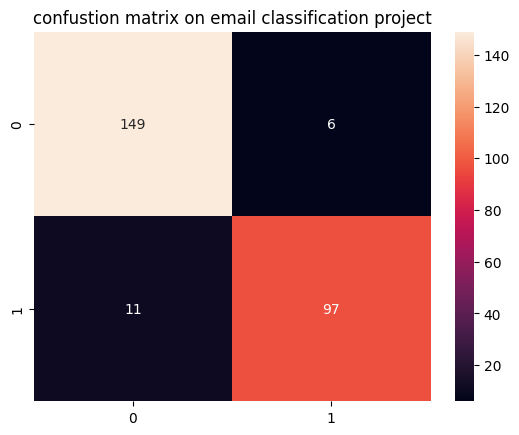

In [56]:
sns.heatmap(matrix,annot = True, fmt= 'd')
plt.title("confustion matrix on email classification project")
plt.show()

In [57]:
# print(classification_report(comparison_df['Actual'], comparison_df['Prediction']))
print(classification_report(comparison_df['Actual'],comparison_df['prediction']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       155
           1       0.94      0.90      0.92       108

    accuracy                           0.94       263
   macro avg       0.94      0.93      0.93       263
weighted avg       0.94      0.94      0.94       263



In [58]:
import os, joblib

In [59]:
os.makedirs('models',exist_ok = True)

In [60]:
joblib.dump(bnb, "./models/bernoulliNB.joblib")
joblib.dump(gnb, "./models/gaussianNB.joblib")
joblib.dump(mnb, "./models/multinomialNB.joblib")

['./models/multinomialNB.joblib']

In [61]:
joblib.dump(bow_obj,'./models/bag_of_words.lb')

['./models/bag_of_words.lb']

In [ ]:
# flipkart.com sql and nosql kya hota h see and come for 2maro
# make an frontend --- email alssification project - inputbox where u can submit the email text in there, submit button
# keep this page ready 2maro. 